# Pandas tutorial

In [3]:
import pandas as pd
import numpy as np

In [5]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [6]:
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [7]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

# Index on series

In [8]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [9]:
s2['bob']

83

In [10]:
s2.loc['bob']

83

In [11]:
s2[1]

83

# init from dict

In [12]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [15]:
s2.keys()

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')

In [16]:
s3.keys()

Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')

In [17]:
s2 + s3

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [18]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [19]:
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

# Series name

In [21]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

# Handling time

In [22]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [23]:
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7

0     4.4
1     5.1
2     6.1
3     6.2
4     6.1
5     6.1
6     5.7
7     5.2
8     4.7
9     4.1
10    3.9
11    3.5
Name: Temperature, dtype: float64

In [24]:
temp_series = pd.Series(temperatures, index=dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

<AxesSubplot:>

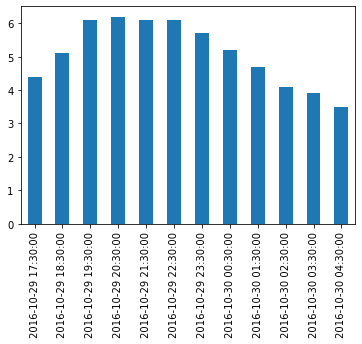

In [26]:
temp_series.plot(kind='bar')

# Resampling

In [32]:
temp_series_freq_2H = temp_series.resample('2H')
temp_series_freq_2H

In [33]:
temp_series_freq_2H = temp_series_freq_2H.mean()
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

2016-10-29 16:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10-29 18:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10-29 20:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10-29 22:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10-30 00:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10-30 02:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
2016-10-30 04:00:00    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: 2H, dtype: object

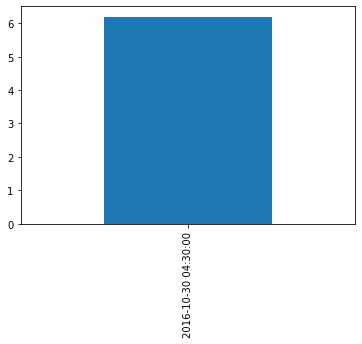

In [31]:
# temp_series_freq_2H.plot(kind='bar')
temp_series_freq_2H.plot(kind="bar")


# Upsampling

In [37]:
temp_series_freq_15min = temp_series.resample('15Min').mean().head(10)
temp_series_freq_15min

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [39]:
temp_series_freq_15min = temp_series.resample('15Min').interpolate(method='cubic').head(10)
temp_series_freq_15min

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

<AxesSubplot:>

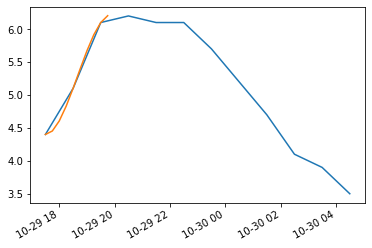

In [40]:
temp_series.plot(label='Period: 1hour')
temp_series_freq_15min.plot(label='Period: 15min')